<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/210117_Decision_Tree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 210117 Decision Tree(결정트리) 1회차

##1. 결정트리란?

결정트리는 분류 모델의 일종으로, 일련의 질문에 대해 대답하며, 데이터를 분해하는 모델이라고 볼 수 있다.

예를들어, 스무고개를 생각할 수 있다.
- 동물인가? 식물인가?
- 동물이면 다리가 2개인가? 4개인가?
- 식물이면 쌍떡잎식물인가 외떡잎식물인가..?

이렇게 분류를 하다보면, 하나의 특성에 도달하게 되고, 답을 얻게 된다.

이를 위해서는 다음과 같은 방식으로 알고리즘을 짜야 한다.

1. 트리의 루트에서 시작한다.
2. 분류가 잘 될 수 있는 질문을 한다. (즉, 한 쪽이 잘 걸러지는)
3. 이를 반복하여, 도착점이 유일한 분류를 가질 수 있도록 만든다.

실제로, 자식 노드측에서 모두 동일한 샘플을 가지게 만들기 위해서는 비용도 많이 들고 과적합의 위험이 있기에, **트리의 최대 깊이를 제한하게 된다.**



## 2. 일단 코드부터 보자.

일단 모델의 예시를 보는 것이 가장 빠르기에, 어떻게 사용하고 활용하는지를 보려고 한다.

sklearn에는 **DecisionTreeClassifier**라는 메소드가 있다.
우선 이를 어떻게 쓰는지 알아보고, 모델에 대한 해석을 하려고 한다.

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris['data']
y = iris['target']
decision_tree = DecisionTreeClassifier(random_state = 0, 
                                      max_depth=4, 
                                      criterion='gini')
decision_tree = decision_tree.fit(X,y)

기본적으로는 위의 방식대로 분류를 한다.
이에 대한 결과를 확인/시각화 하는 방법이 여러가지가 있는데, 우선은 sklearn의 tree package의 활용법이다.

[Text(167.4, 195.696, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 152.208, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 108.72, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 65.232, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 21.744, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 65.232, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 21.744, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(283.2923076923077, 108.72, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(25

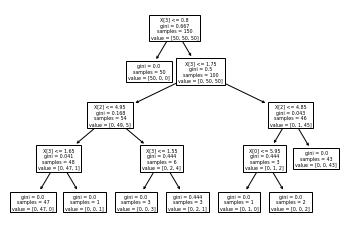

In [4]:
from sklearn import tree
tree.plot_tree(decision_tree)

그림이 잘 작아서 안보이지만, 첫번째 노드에서 분기를 통해 하나의 특성을 완벽히 분류했음을 알 수 있고 나머지도 특성을 나누었음을 알 수 있다. 깊이를 제한했기에 일부 노드에서 결국 3개중 2개를 가르지 못했음을 알 수 있지만 150개중에서 3개에 실패한 정도이므로 크게 아쉽지는 않다.

이를 텍스트를 통해 결과를 확인하는 방법도 존재한다.

In [5]:
from sklearn.tree import export_text

r = export_text(decision_tree, 
                feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



graphiz 패키지를 사용하면 다음과 같이 디자인도 가능하다.

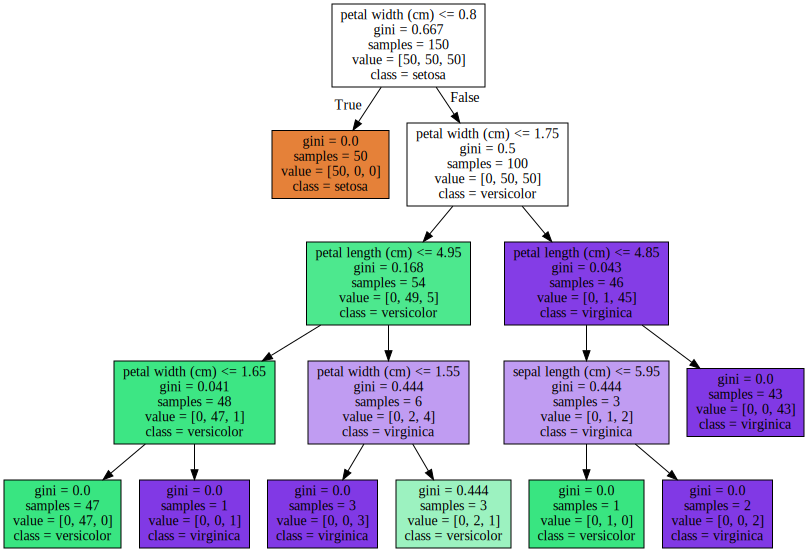

In [8]:
import graphviz
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names = iris.feature_names,
                                filled = True,
                                class_names=iris.target_names)
graph = graphviz.Source(dot_data)
graph

간단하게 해석해보면 value의 세 성분은
- setosa
- versicolor
- virginica

라는 iris의 3 종류로 구분된다.

맨 처음에 petal width의 값 구분으로 모든 setosa가 분류되고 나머지를 기준으로 또 다른 기준으로 나눈다. 이를 반복하여 하나의 성분만이 0이 아닐때까지 진행시키던가, 높이가 부모 노드를 제외하고 4가 될 경우, 중단한다.

그 결과 최종 3개의 데이터 분류에 실패했다.

## 3. 정보 이득과 불순도 지표

코드를 보다가 몇 가지 의문점이 생긴다.
- gini는 무엇인가?
- 모델을 짤 때 criterion이라는 것이 있는데 그것은 무엇인가?
- 분류가 잘 된다는 것은 무엇인가?

이를 위해서는 '가장 정보가 풍부한 특성' 즉, 정보의 이익을 최대화시키는 방법에 대해 고민해야 한다. **정보 이득** 함수는 다음과 같이 정의한다.

$$ IG(D_{p},f)=I(D_{p})-\frac{N_{left}}{N_{p}}I(D_{left})-\frac{N_{right}}{N_{p}}I(D_{right})$$


식이 좀 복잡한데 기호의 의미를 파악할려고 한다.
- $ f $ : 분할에 사용할 특성
- $ D_{p}, D_{j}$ : 부모와 j번째 자식 노드의 데이터
- $ N_{p}$ : 부모노드 전체의 샘플 수
- $ N_{left}, N_{right} $ : 좌측 자식, 우측 자식의 샘플 수

즉 좌측과 우측에서 얼마나 틀렸는지를 반영하여 부모 값에서 빼는 과정이다.
이를 최대화 시킨다는 것은, 한 측이 최대한 올바르게 분류되어야 값이 작아질 것이다.

여기서 $I$가 이제 불순도 지표, 즉 '얼마나 틀렸나'를 표현한다고 보면 된다.
불순도 지표에는 여러 종류가 있는데
- 엔트로피 (entropy)
- 지니 불순도(Gini impurity)
- 분류 오차(classfication error)

등을 예시로 들 수 있다.


### 1) 엔트로피
이제 앞으로, $p(i|t)$는 노드 $t$에서, class $i$에 속한 샘플의 비율이다.
엔트로피는 다음과 같이 정의한다.

$$I_{H}(t) = - \sum_{i=1}^{c} p(i|t)log_{2}p(i|t) $$

만일 하나의 노드에서 모든 샘플이 같은 클래스일 경우 엔트로피 값은 0으로 엔트로피를 지표로 쓸 경우 정보 이득이 최대화가 된다. 

한편, class가 2개의 샘플에 1:1로 동일하게 분포될 경우 엔트로피가 1이 되다.


### 2) 지니 불순도

지니 불순도는 잘못 분류될 확률을 최소화시키기 위한 기준으로 여사건을 활용한다.
$$I_{G}(t) = - \sum_{i=1}^{c} p(i|t)(1-p(i|t)) $$

엔트로피와 비슷하게, class가 2개의 샘플에 1 : 1로 동일하게 분포될 경우 지니 불순도가 최대가 된다. (0.5)

### 3) 분류 오차
이는 단순히 여사건만을 고려한다.
$$ I_{E} = 1-max \lbrace  p(i|t) \rbrace $$

노드의 클래스 확률 변화에 덜 민감하여 나머지 2개를 사용한다.


추가 참조 공부자료 : https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use

이와 추가 공부 이후, Decision_Tree 2를 나중에 올려보려고 한다.